In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [85]:
gym_survey_df = pd.read_csv('../EDA-COGS-164/Gym Survey (Responses) - Form Responses 1.csv')

In [86]:
gym_survey_df

,Timestamp,Which of the following age ranges best describes you?,Which of the following best describes your gender?,How long have you been going to the gym?,How many days a week do you want to go to the gym?,"On average, how many days do you actually go to the gym in a week?",Do you prefer going to the gym alone or with a partner/partners?,Do you have a consistent gym partner?,"If you have a gym partner, are they the same gender as you?",What initially motivated you to start going to the gym?,Does external pressure from your personal connections influence your decision to go to the gym?,What sources of external pressure most influence your decision to attend the gym?,Do you find external pressure to attend the gym more motivating or discouraging? Please explain why.,"If you have a gym partner, how do they affect the frequency of your gym attendance vs. if you were going alone?",Do you ever go to the gym even if you don't want to because you don't want to let your gym partner down,Would a close friend or an acquaintance as a gym partner make you feel held more accountable?,"If your gym partner really wanted to work out but you weren’t feeling up for it, to what degree would their eagerness affect your decision to go?","If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?","If you had to walk to the gym and the weather was mild/heavy rain and you didn't really want to go, but your gym partner was still going despite the weather, how likely would you be to go anyway?","If your gym partner canceled, how likely would you be to still go to the gym?"
0,2/23/2024 8:32:03,18-24,Male,3+ years,6,2,With a partner,No,Yes,Physical appearance,No,Social Media,I find it motivating because I want to live up...,Having a gym partner leads to me going to the ...,"Yes, I'll go even when I don't want to because...",A close friend as a gym partner would make me ...,Their eagerness would compel me to go to the gym,I would be less likely to go to the gym if my ...,I would be more likely to go to the gym if my ...,Very Likely
1,2/23/2024 8:51:23,25-34,Non-binary,< 3 years,5,4,With partners,Yes,No,Physical appearance,Yes,Social Media,discouraging- not sure if i can live up to the...,Having a gym partner leads to me going to the ...,"Yes, I'll go even when I don't want to because...",A close friend as a gym partner would make me ...,Their eagerness would compel me to go to the gym,I would be less likely to go to the gym if my ...,I would be more likely to go to the gym if my ...,Neutral
2,2/23/2024 19:08:16,55 and over,Female,3+ years,5,2,With a partner,No,NaN,For a sport,No,Family,"Discouraging. I like to do it for fun, not bec...",Having a gym partner leads to me going to the ...,"Yes, I'll go even when I don't want to because...",I would feel equally held accountable by both ...,Their eagerness would compel me to go to the gym,I wouldn't go to the gym if my partner wasn't ...,I would be more likely to go to the gym if my ...,Likely
3,2/25/2024 9:11:48,25-34,Female,3+ years,4,4,Alone,No,NaN,"Physical appearance, Health, For a sport",No,Social Media,I follow lifters on Instagram which I find mot...,Having a gym partner doesn't affect how often ...,"No, letting my gym partner down doesn't affect...",I would feel equally held accountable by both ...,Their eagerness would compel me to go to the gym,I would go to the gym even if my partner wasn’...,I would be more likely to go to the gym if my ...,Very Likely
4,2/25/2024 9:13:11,25-34,Female,< 3 years,4,4,With a partner,Yes,No,"Physical appearance, Health",No,NaN,Doesn’t affect me much at all,Having a gym partner leads to me going to the ...,"Yes, I'll go even when I don't want to because...",A close friend as a gym partner would make me ...,Their eagerness would make me consider going t...,I would go to the gym even if my partner wasn’...,I would be more likely to go to the gym if my ...,Ve

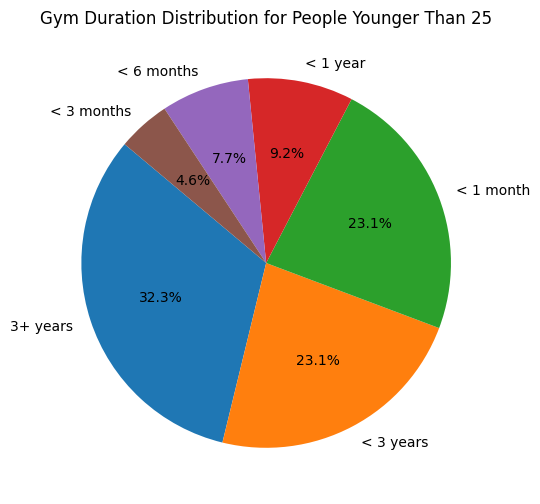

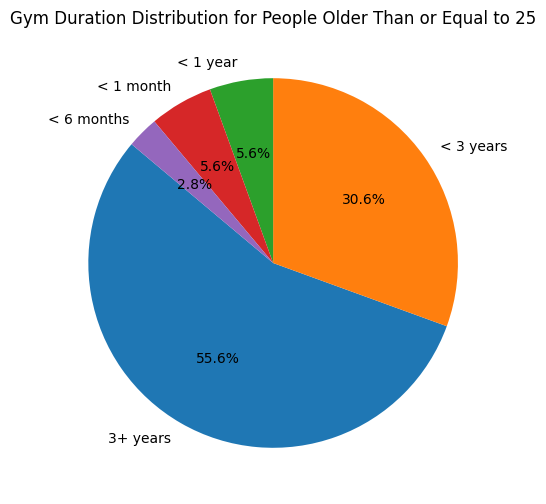

In [87]:
# Filter for people younger than 25
younger_than_25_df = gym_survey_df[gym_survey_df["Which of the following age ranges best describes you?"].isin(["Under 18", "18-24"])]

# Plotting pie chart for gym duration distribution for people younger than 25
gym_duration_counts_younger = younger_than_25_df["How long have you been going to the gym?"].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gym_duration_counts_younger, labels=gym_duration_counts_younger.index, autopct='%1.1f%%', startangle=140)
plt.title('Gym Duration Distribution for People Younger Than 25')
plt.show()

# Filter for people older than or equal to 25
older_than_or_equal_25_df = gym_survey_df[gym_survey_df["Which of the following age ranges best describes you?"].isin(["25-34", "35-44", "45-54", "55 and over"])]

# Plotting pie chart for gym duration distribution for people older than or equal to 25
gym_duration_counts_older = older_than_or_equal_25_df["How long have you been going to the gym?"].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gym_duration_counts_older, labels=gym_duration_counts_older.index, autopct='%1.1f%%', startangle=140)
plt.title('Gym Duration Distribution for People Older Than or Equal to 25')
plt.show()

In [88]:
gym_attendance_analysis_df = gym_survey_df[[
    "How long have you been going to the gym?", 
    "How many days a week do you want to go to the gym?", 
    "On average, how many days do you actually go to the gym in a week?"
]]

# Group by the duration of gym attendance and calculate the average for desired and actual gym days
gym_attendance_summary = gym_attendance_analysis_df.groupby("How long have you been going to the gym?").mean()
gym_attendance_summary.reset_index(inplace=True)

# Defining the order for gym attendance duration categories
duration_order = ["< 1 month", "< 3 months", "< 6 months", "< 1 year", "< 3 years", "3+ years"]

# Ensuring the DataFrame respects this order for gym attendance duration
gym_attendance_summary['Duration Ordered'] = pd.Categorical(gym_attendance_summary['How long have you been going to the gym?'], categories=duration_order, ordered=True)

# Sorting the DataFrame by the ordered duration category
gym_attendance_summary_sorted = gym_attendance_summary.sort_values('Duration Ordered').drop('Duration Ordered', axis=1)
print(gym_attendance_summary_sorted)

  How long have you been going to the gym?  \
1                                < 1 month   
3                               < 3 months   
5                               < 6 months   
2                                 < 1 year   
4                                < 3 years   
0                                 3+ years   

   How many days a week do you want to go to the gym?  \
1                                           2.411765    
3                                           2.666667    
5                                           4.000000    
2                                           4.625000    
4                                           4.153846    
0                                           4.536585    

   On average, how many days do you actually go to the gym in a week?  
1                                           0.823529                   
3                                           1.333333                   
5                                           3.166667         

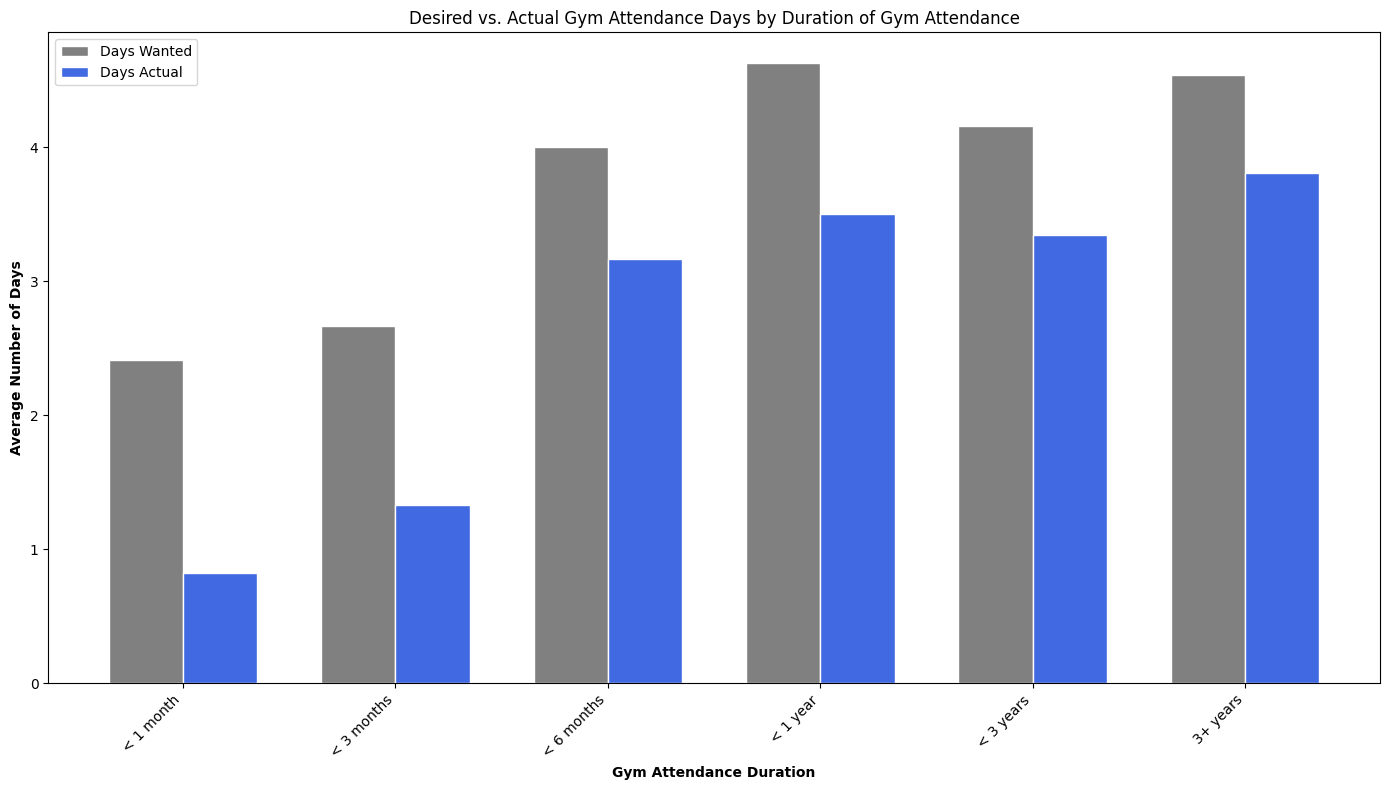

In [89]:
# Plotting bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.35  # width of the bars

# Positions of the bar groups on the x-axis
r1 = range(len(gym_attendance_summary_sorted))
r2 = [x + bar_width for x in r1]

# Creating the bar chart
plt.bar(r1, gym_attendance_summary_sorted["How many days a week do you want to go to the gym?"], color='grey', width=bar_width, edgecolor='white', label='Days Wanted')
plt.bar(r2, gym_attendance_summary_sorted["On average, how many days do you actually go to the gym in a week?"], color='royalblue', width=bar_width, edgecolor='white', label='Days Actual')

# Adding labels, title, and legend
plt.xlabel('Gym Attendance Duration', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(gym_attendance_summary_sorted))], gym_attendance_summary_sorted["How long have you been going to the gym?"], rotation=45, ha="right")
plt.ylabel('Average Number of Days', fontweight='bold')
plt.title('Desired vs. Actual Gym Attendance Days by Duration of Gym Attendance')
plt.legend()

# Showing plot
plt.tight_layout()
plt.show()

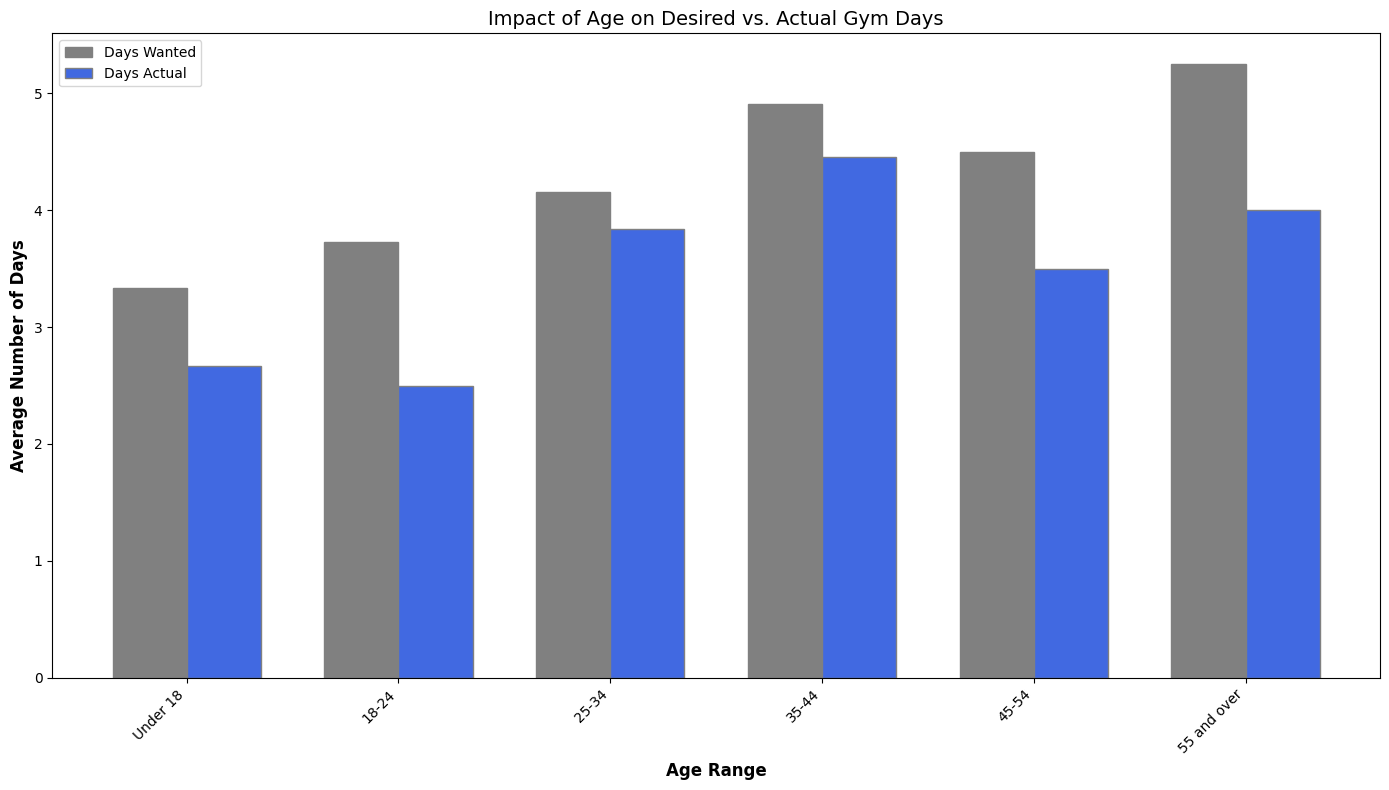

In [90]:
age_days_df = gym_survey_df[[
    "Which of the following age ranges best describes you?", 
    "How many days a week do you want to go to the gym?", 
    "On average, how many days do you actually go to the gym in a week?"
]]

# Grouping by age range and calculating the mean for Days Wanted and Days Actual
age_days_summary = age_days_df.groupby("Which of the following age ranges best describes you?").mean()
age_days_summary.reset_index(inplace=True)

# Manually defining the order of the age categories for sorting
age_order = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55 and over"]
age_days_summary['Age Ordered'] = pd.Categorical(age_days_summary['Which of the following age ranges best describes you?'], categories=age_order, ordered=True)

# Sorting the DataFrame by the ordered age category
age_days_summary_sorted = age_days_summary.sort_values('Age Ordered').drop('Age Ordered', axis=1)

# Plotting
plt.figure(figsize=(14, 8))

# Recalculating positions of the bar groups on the x-axis for the new DataFrame
r1_age = range(len(age_days_summary_sorted))
r2_age = [x + bar_width for x in r1_age]

# Creating bar chart with sorted data
plt.bar(r1_age, age_days_summary_sorted["How many days a week do you want to go to the gym?"], color='grey', width=bar_width, edgecolor='grey', label='Days Wanted')
plt.bar(r2_age, age_days_summary_sorted["On average, how many days do you actually go to the gym in a week?"], color='royalblue', width=bar_width, edgecolor='grey', label='Days Actual')

# Adding labels, title, and legend
plt.xlabel('Age Range', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width/2 for r in r1_age], age_days_summary_sorted['Which of the following age ranges best describes you?'], rotation=45, ha="right")
plt.ylabel('Average Number of Days', fontweight='bold', fontsize=12)
plt.title('Impact of Age on Desired vs. Actual Gym Days', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

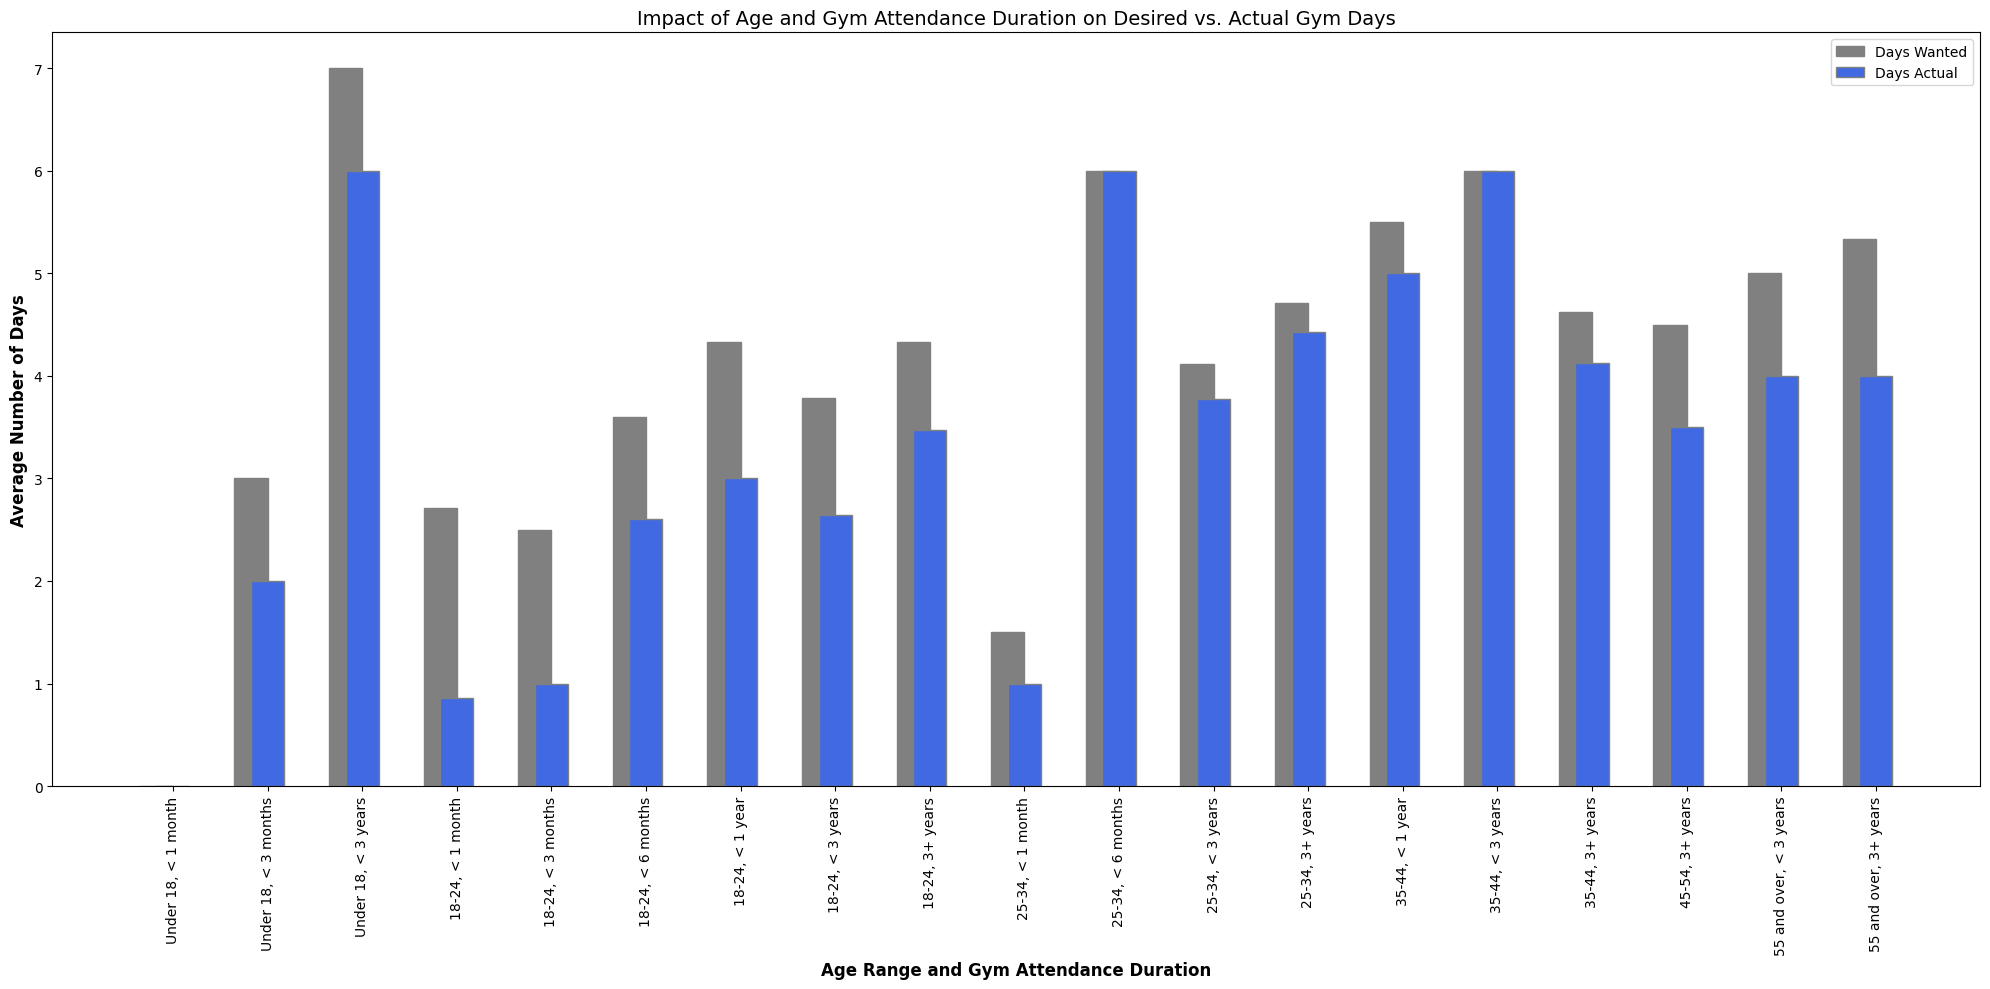

In [91]:
filtered_df = gym_survey_df[[
    "Which of the following age ranges best describes you?", 
    "How long have you been going to the gym?",
    "How many days a week do you want to go to the gym?", 
    "On average, how many days do you actually go to the gym in a week?"
]]

# Grouping the data by both age range and gym attendance duration
age_duration_grouped = filtered_df.groupby(["Which of the following age ranges best describes you?", "How long have you been going to the gym?"]).mean()
age_duration_grouped.reset_index(inplace=True)

# Apply the defined orders
age_duration_grouped['Age Ordered'] = pd.Categorical(age_duration_grouped['Which of the following age ranges best describes you?'], categories=age_order, ordered=True)
age_duration_grouped['Duration Ordered'] = pd.Categorical(age_duration_grouped['How long have you been going to the gym?'], categories=duration_order, ordered=True)

# Sort by both age and duration
age_duration_grouped_sorted = age_duration_grouped.sort_values(['Age Ordered', 'Duration Ordered']).drop(['Age Ordered', 'Duration Ordered'], axis=1)


plt.figure(figsize=(20, 10))
bar_width = 0.35

# Setting positions of the bar groups on the x-axis
r1 = range(len(age_duration_grouped_sorted))
r2 = [x + bar_width/2 for x in r1] # using seaborn after this, miserable

# Creating the bar chart
plt.bar(r1, age_duration_grouped_sorted["How many days a week do you want to go to the gym?"], color='grey', width=bar_width, edgecolor='grey', label='Days Wanted')
plt.bar(r2, age_duration_grouped_sorted["On average, how many days do you actually go to the gym in a week?"], color='royalblue', width=bar_width, edgecolor='grey', label='Days Actual')

# Adding labels, title, and legend
plt.xlabel('Age Range and Gym Attendance Duration', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width/2 for r in range(len(age_duration_grouped_sorted))], [f"{row['Which of the following age ranges best describes you?']}, {row['How long have you been going to the gym?']}" for index, row in age_duration_grouped_sorted.iterrows()], rotation=90, ha="center")
plt.ylabel('Average Number of Days', fontweight='bold', fontsize=12)
plt.title('Impact of Age and Gym Attendance Duration on Desired vs. Actual Gym Days', fontsize=14)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()





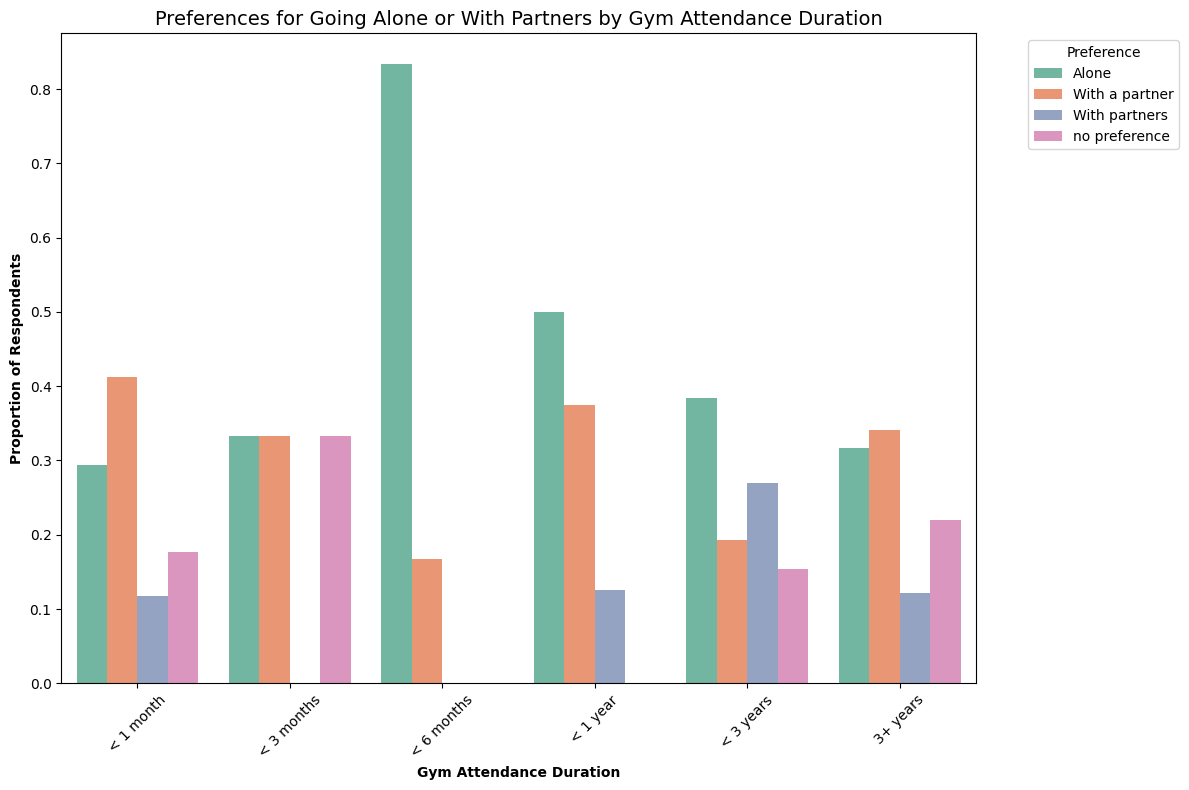

In [92]:
duration_preference_df = gym_survey_df[[
    "How long have you been going to the gym?", 
    "Do you prefer going to the gym alone or with a partner/partners?"
]]

# Counting the number of respondents for each preference within each gym attendance duration category
duration_preference_count = duration_preference_df.groupby(["How long have you been going to the gym?", "Do you prefer going to the gym alone or with a partner/partners?"]).size().reset_index(name='Count')
duration_preference_count['Duration Ordered'] = pd.Categorical(duration_preference_count['How long have you been going to the gym?'], categories=duration_order, ordered=True)

# Sorting the DataFrame 
duration_preference_sorted = duration_preference_count.sort_values('Duration Ordered')

# Calculating the total number of respondents for each gym attendance duration category
total_respondents = duration_preference_sorted.groupby('How long have you been going to the gym?')['Count'].transform('sum')

# Calculating the proportion of respondents for each preference within each category
duration_preference_sorted['Proportion'] = duration_preference_sorted['Count'] / total_respondents

# Plotting normalized data
plt.figure(figsize=(12, 8))
sns.barplot(data=duration_preference_sorted, x='How long have you been going to the gym?', y='Proportion', hue='Do you prefer going to the gym alone or with a partner/partners?', order=duration_order, palette='Set2')
plt.xlabel('Gym Attendance Duration', fontweight='bold')
plt.ylabel('Proportion of Respondents', fontweight='bold')
plt.title('Preferences for Going Alone or With Partners by Gym Attendance Duration', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Preference', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [93]:
duration_preference_sorted[(duration_preference_sorted["Do you prefer going to the gym alone or with a partner/partners?"] == 'Alone') & (duration_preference_sorted['Proportion'] >= .8)]
# probably random outlier?

,How long have you been going to the gym?,Do you prefer going to the gym alone or with a partner/partners?,Count,Duration Ordered,Proportion
18,< 6 months,Alone,5,< 6 months,0.833333


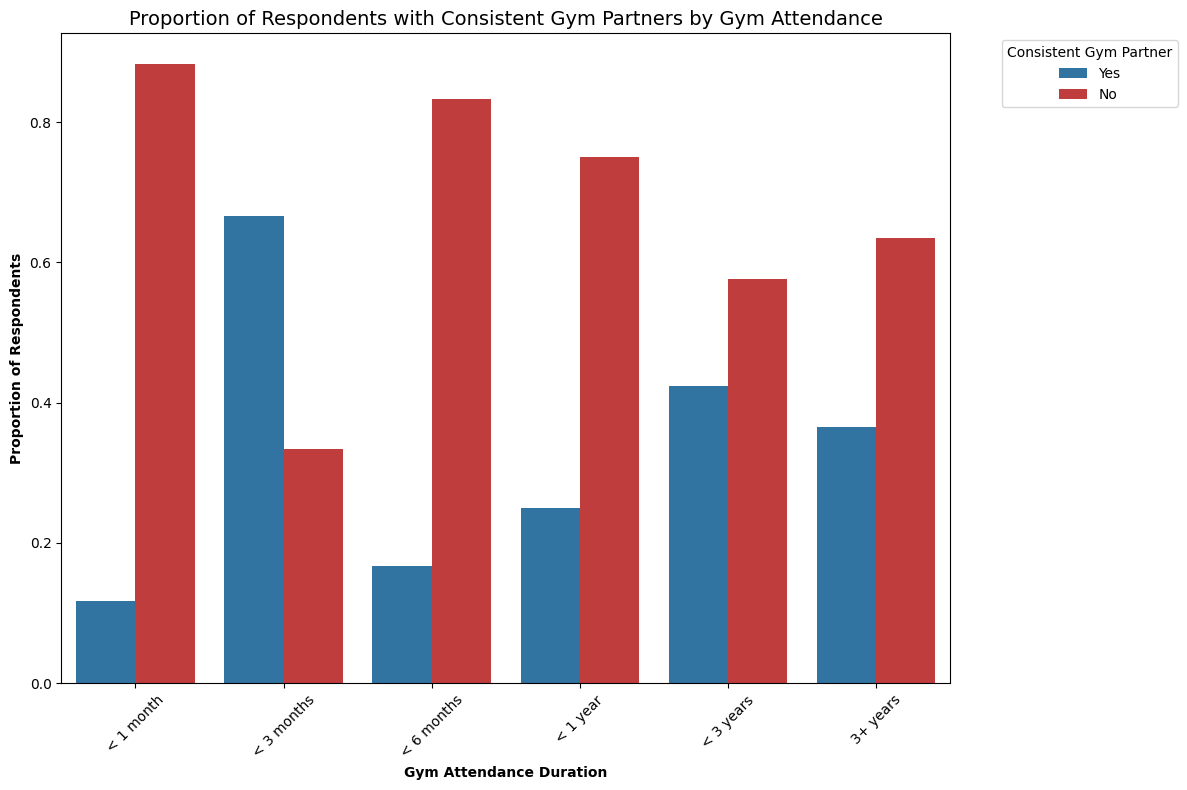

In [94]:
duration_partner_df = gym_survey_df[[
    "How long have you been going to the gym?", 
    "Do you have a consistent gym partner?"
]]

# Grouping by gym attendance duration and consistent gym partner, then counting respondents
duration_partner_count = duration_partner_df.groupby(["How long have you been going to the gym?", "Do you have a consistent gym partner?"]).size().reset_index(name='Count')


# Calculating the total respondents for each gym attendance duration category
total_respondents_by_duration = duration_partner_count.groupby('How long have you been going to the gym?')['Count'].transform('sum')

# Calculating the proportion of respondents for each status within each gym attendance duration category
duration_partner_count['Proportion'] = duration_partner_count['Count'] / total_respondents_by_duration

# Customizing colors
color_mapping = {"Yes": "#1f77b4", "No": "#d62728"}

# Plotting normalized data 
plt.figure(figsize=(12, 8))
sns.barplot(data=duration_partner_count, x='How long have you been going to the gym?', y='Proportion', hue='Do you have a consistent gym partner?', order=duration_order, palette=color_mapping, hue_order = ['Yes', 'No'])
plt.xlabel('Gym Attendance Duration', fontweight='bold')
plt.ylabel('Proportion of Respondents', fontweight='bold')
plt.title('Proportion of Respondents with Consistent Gym Partners by Gym Attendance', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Consistent Gym Partner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

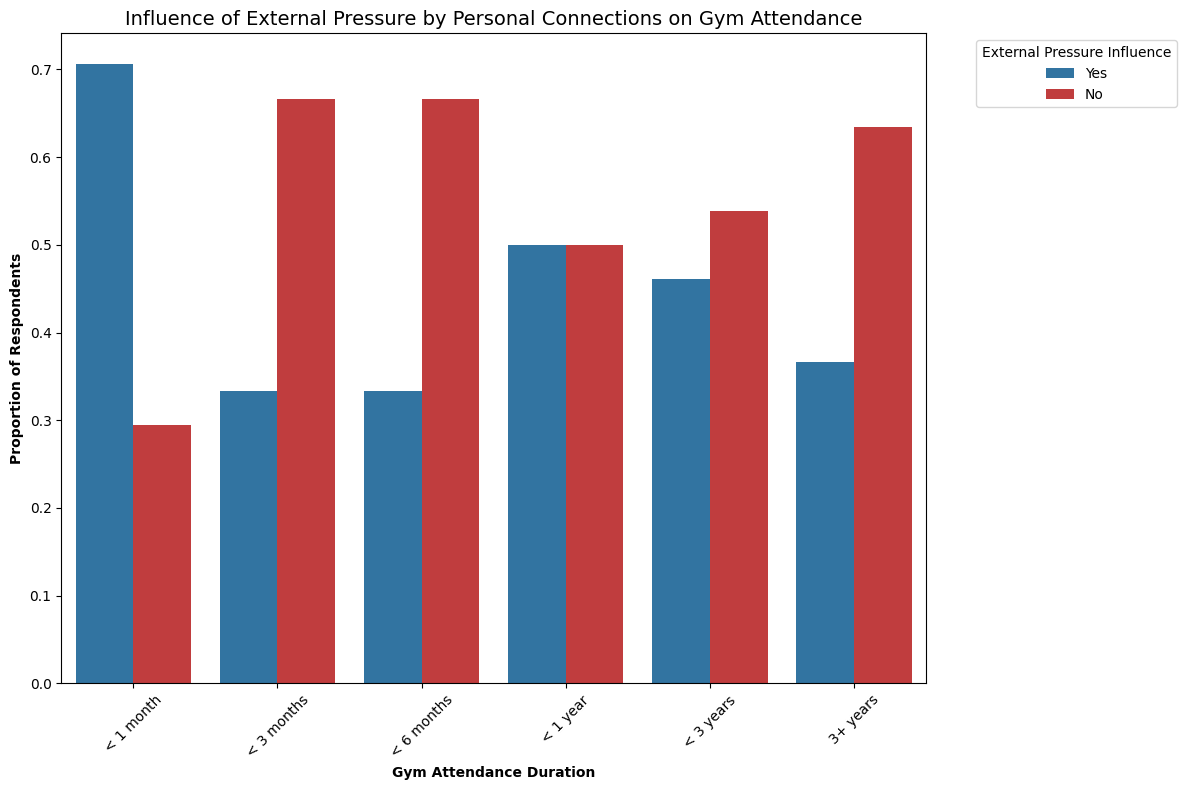

In [95]:
duration_external_pressure_df = gym_survey_df[[
    "How long have you been going to the gym?", 
    "Does external pressure from your personal connections influence your decision to go to the gym?"
]]
# Grouping by gym attendance duration and external pressure influence, then counting respondents
duration_pressure_count = duration_external_pressure_df.groupby(["How long have you been going to the gym?", "Does external pressure from your personal connections influence your decision to go to the gym?"]).size().reset_index(name='Count')

# Calculating the total respondents for each gym attendance duration category
total_respondents_by_duration = duration_pressure_count.groupby('How long have you been going to the gym?')['Count'].transform('sum')

# Calculating the proportion of respondents for each status within each gym attendance duration category
duration_pressure_count['Proportion'] = duration_pressure_count['Count'] / total_respondents_by_duration

# Customizing colors
color_mapping = {"Yes": "#1f77b4", "No": "#d62728"}

# Plotting normalized data
plt.figure(figsize=(12, 8))
sns.barplot(data=duration_pressure_count, x='How long have you been going to the gym?', y='Proportion', hue='Does external pressure from your personal connections influence your decision to go to the gym?', order=duration_order, palette=color_mapping, hue_order = ['Yes', 'No'])
plt.xlabel('Gym Attendance Duration', fontweight='bold')
plt.ylabel('Proportion of Respondents', fontweight='bold')
plt.title('Influence of External Pressure by Personal Connections on Gym Attendance', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='External Pressure Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [96]:
# Filtering the DataFrame based on gym preference and external pressure influence
filtered_df = gym_survey_df[
    ['Do you prefer going to the gym alone or with a partner/partners?', 
     'Does external pressure from your personal connections influence your decision to go to the gym?']
].copy()
filtered_df.columns = ['Gym Preference', 'External Pressure Influence']
filtered_df.value_counts() # plot below correct

Gym Preference  External Pressure Influence
Alone           No                             24
With a partner  No                             17
Alone           Yes                            14
With a partner  Yes                            14
With partners   Yes                             9
no preference   Yes                             9
                No                              8
With partners   No                              6
Name: count, dtype: int64

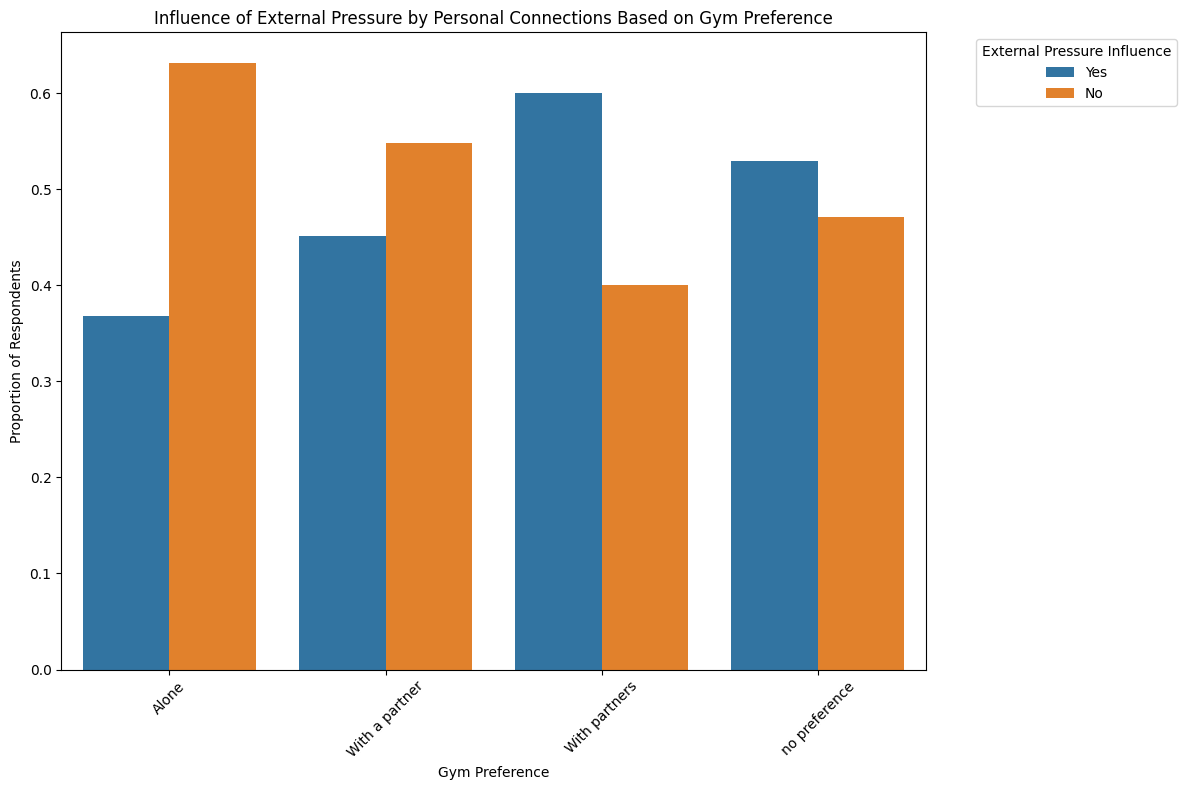

In [97]:
# Grouping by gym preference and external pressure influence, then counting respondents
preference_pressure_count = filtered_df.groupby(['Gym Preference', 'External Pressure Influence']).size().reset_index(name='Count')

# Calculating the total respondents for each gym preference category
total_respondents_by_preference = preference_pressure_count.groupby('Gym Preference')['Count'].transform('sum')

# Calculating the proportion of respondents for each status within each gym preference category
preference_pressure_count['Proportion'] = preference_pressure_count['Count'] / total_respondents_by_preference

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=preference_pressure_count, x='Gym Preference', y='Proportion', hue='External Pressure Influence', hue_order = ['Yes', 'No'])
plt.title('Influence of External Pressure by Personal Connections Based on Gym Preference')
plt.xlabel('Gym Preference')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='External Pressure Influence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

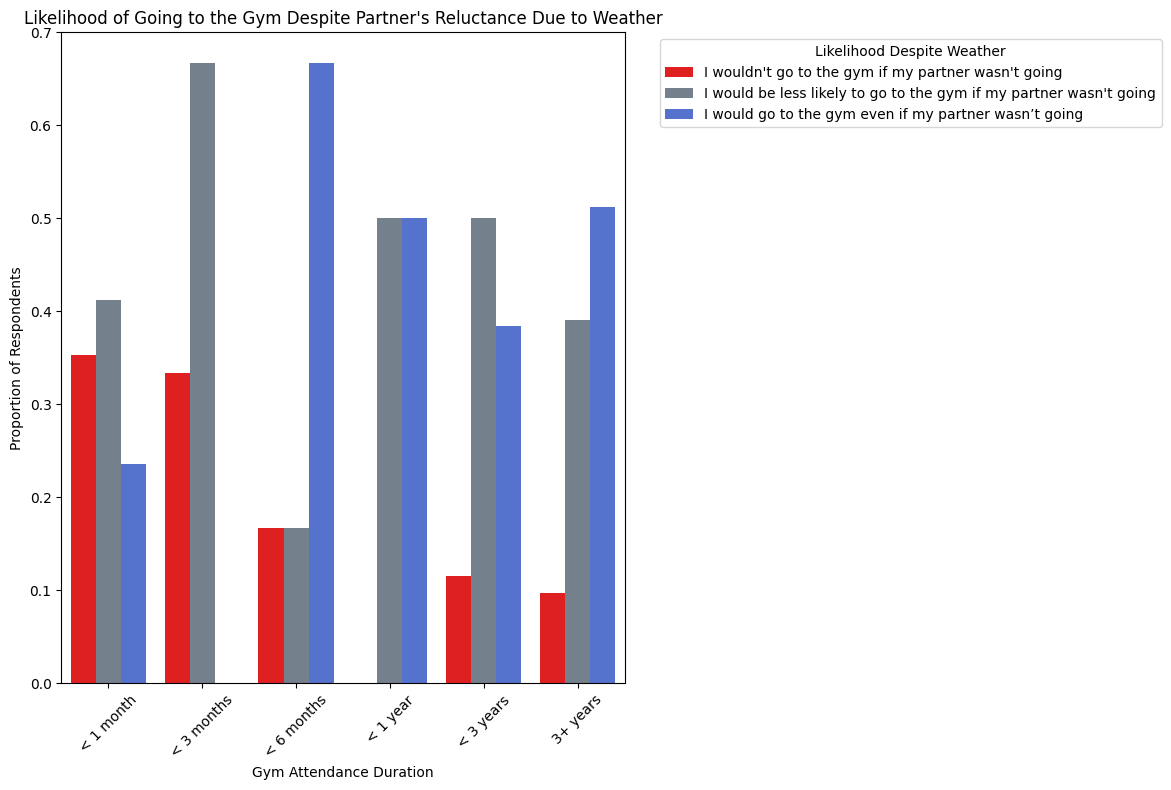

In [98]:
duration_weather_df = gym_survey_df[[
    "How long have you been going to the gym?", 
    "If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?"
]]

# Grouping by gym attendance duration and likelihood, then counting respondents
duration_weather_count = duration_weather_df.groupby([
    "How long have you been going to the gym?", 
    "If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?"
]).size().reset_index(name='Count')

# Calculating the total respondents for each gym attendance duration category
total_respondents_by_duration = duration_weather_count.groupby("How long have you been going to the gym?")['Count'].transform('sum')

# Calculating the proportion of respondents for each status within each gym attendance duration category
duration_weather_count['Proportion'] = duration_weather_count['Count'] / total_respondents_by_duration

# Customizing colors
color_mapping = {"I wouldn't go to the gym if my partner wasn't going": "red", 
                 "I would be less likely to go to the gym if my partner wasn't going": "slategrey",
                 "I would go to the gym even if my partner wasn’t going": "royalblue"}

# Plot data
plt.figure(figsize=(12, 8))
sns.barplot(data=duration_weather_count, x="How long have you been going to the gym?", y='Proportion', hue="If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?", 
            palette=color_mapping, 
            order = duration_order, 
            hue_order = ["I wouldn't go to the gym if my partner wasn't going", "I would be less likely to go to the gym if my partner wasn't going", "I would go to the gym even if my partner wasn’t going"])
plt.title('Likelihood of Going to the Gym Despite Partner\'s Reluctance Due to Weather')
plt.xlabel('Gym Attendance Duration')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Likelihood Despite Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

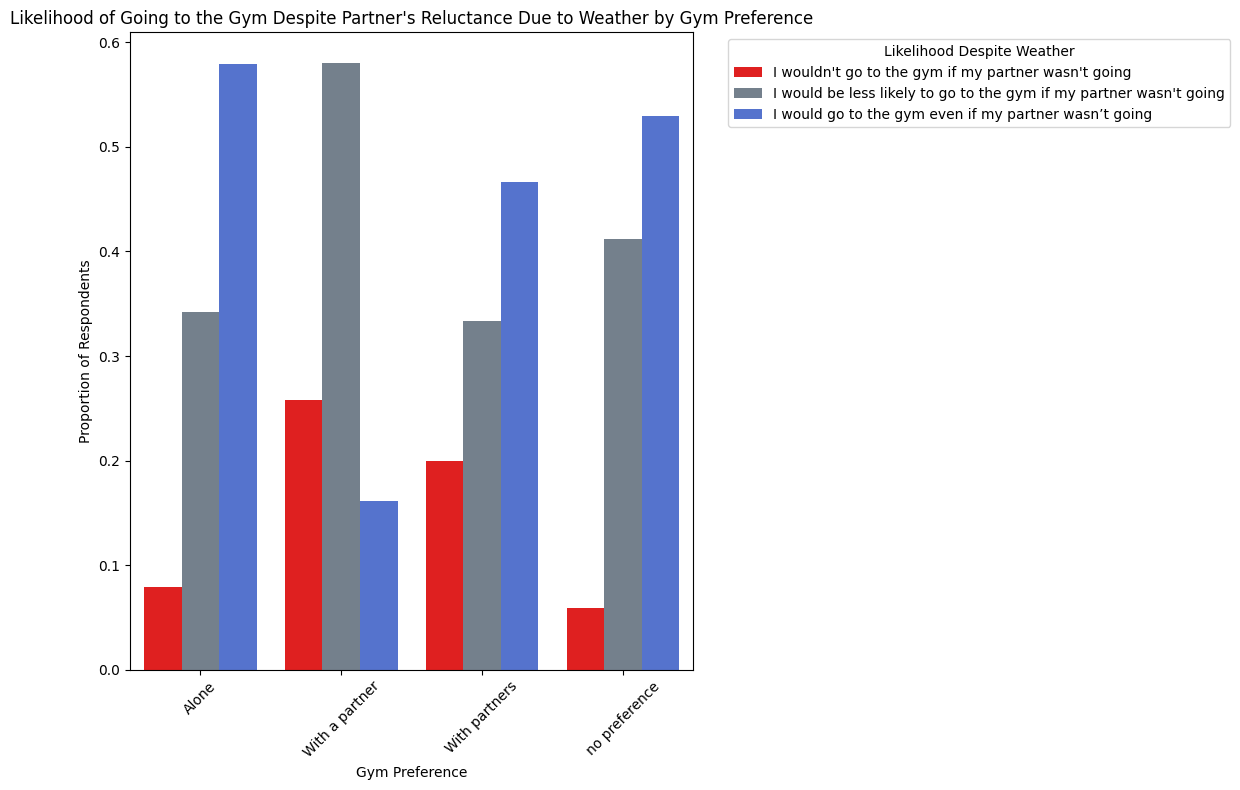

In [99]:
# i give up on annotating all code, fix lateR 
preference_weather_df = gym_survey_df[[
    "Do you prefer going to the gym alone or with a partner/partners?", 
    "If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?"
]]

preference_weather_count = preference_weather_df.groupby([
    "Do you prefer going to the gym alone or with a partner/partners?", 
    "If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?"
]).size().reset_index(name='Count')

total_respondents_by_preference = preference_weather_count.groupby("Do you prefer going to the gym alone or with a partner/partners?")['Count'].transform('sum')

preference_weather_count['Proportion'] = preference_weather_count['Count'] / total_respondents_by_preference

color_mapping = {
    "I wouldn't go to the gym if my partner wasn't going": "red", 
    "I would be less likely to go to the gym if my partner wasn't going": "slategrey",
    "I would go to the gym even if my partner wasn’t going": "royalblue"
}

plt.figure(figsize=(12, 8))
sns.barplot(data=preference_weather_count, 
            x="Do you prefer going to the gym alone or with a partner/partners?", 
            y='Proportion', 
            hue="If you had to walk to the gym and the weather was mild/heavy rain and you still wanted to go, but your gym partner didn't want to go, how likely would you be to go anyway?",
            palette=color_mapping,
            hue_order = ["I wouldn't go to the gym if my partner wasn't going", "I would be less likely to go to the gym if my partner wasn't going", "I would go to the gym even if my partner wasn’t going"])
plt.title('Likelihood of Going to the Gym Despite Partner\'s Reluctance Due to Weather by Gym Preference')
plt.xlabel('Gym Preference')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Likelihood Despite Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

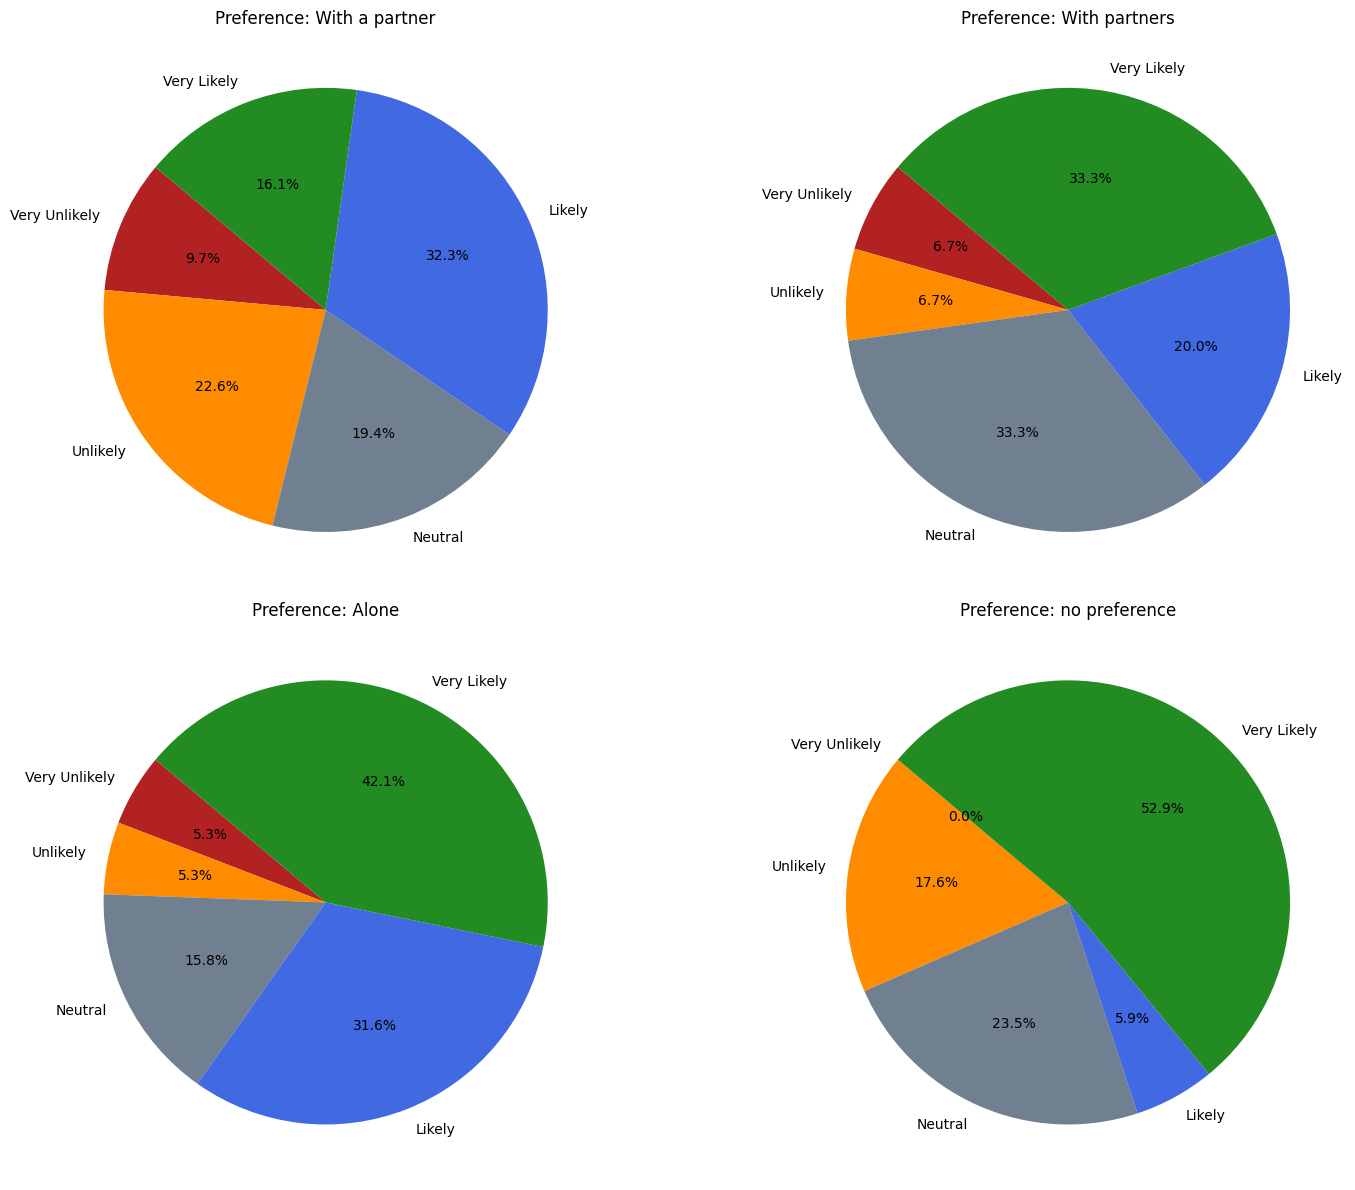

In [100]:
preference_cancellation_df = gym_survey_df[[
    "Do you prefer going to the gym alone or with a partner/partners?", 
    "If your gym partner canceled, how likely would you be to still go to the gym?"
]]

unique_preferences = preference_cancellation_df["Do you prefer going to the gym alone or with a partner/partners?"].unique()

color_mapping = {
    "Very Unlikely": "firebrick",
    "Unlikely": "darkorange",
    "Neutral": "slategrey",
    "Likely": "royalblue",
    "Very Likely": "forestgreen"
}

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()

for i, preference in enumerate(unique_preferences):
    subset_df = preference_cancellation_df[preference_cancellation_df["Do you prefer going to the gym alone or with a partner/partners?"] == preference]
    response_counts = subset_df["If your gym partner canceled, how likely would you be to still go to the gym?"].value_counts()
    responses_sorted = response_counts.reindex(color_mapping.keys()).fillna(0)
    colors = [color_mapping[response] for response in responses_sorted.index]
    
    axs[i].pie(responses_sorted, labels=responses_sorted.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Preference: {preference}')

plt.tight_layout()
plt.show()
# only reason i made pi charts for these is because a barplot makes this so much more overly complicated holy fuck

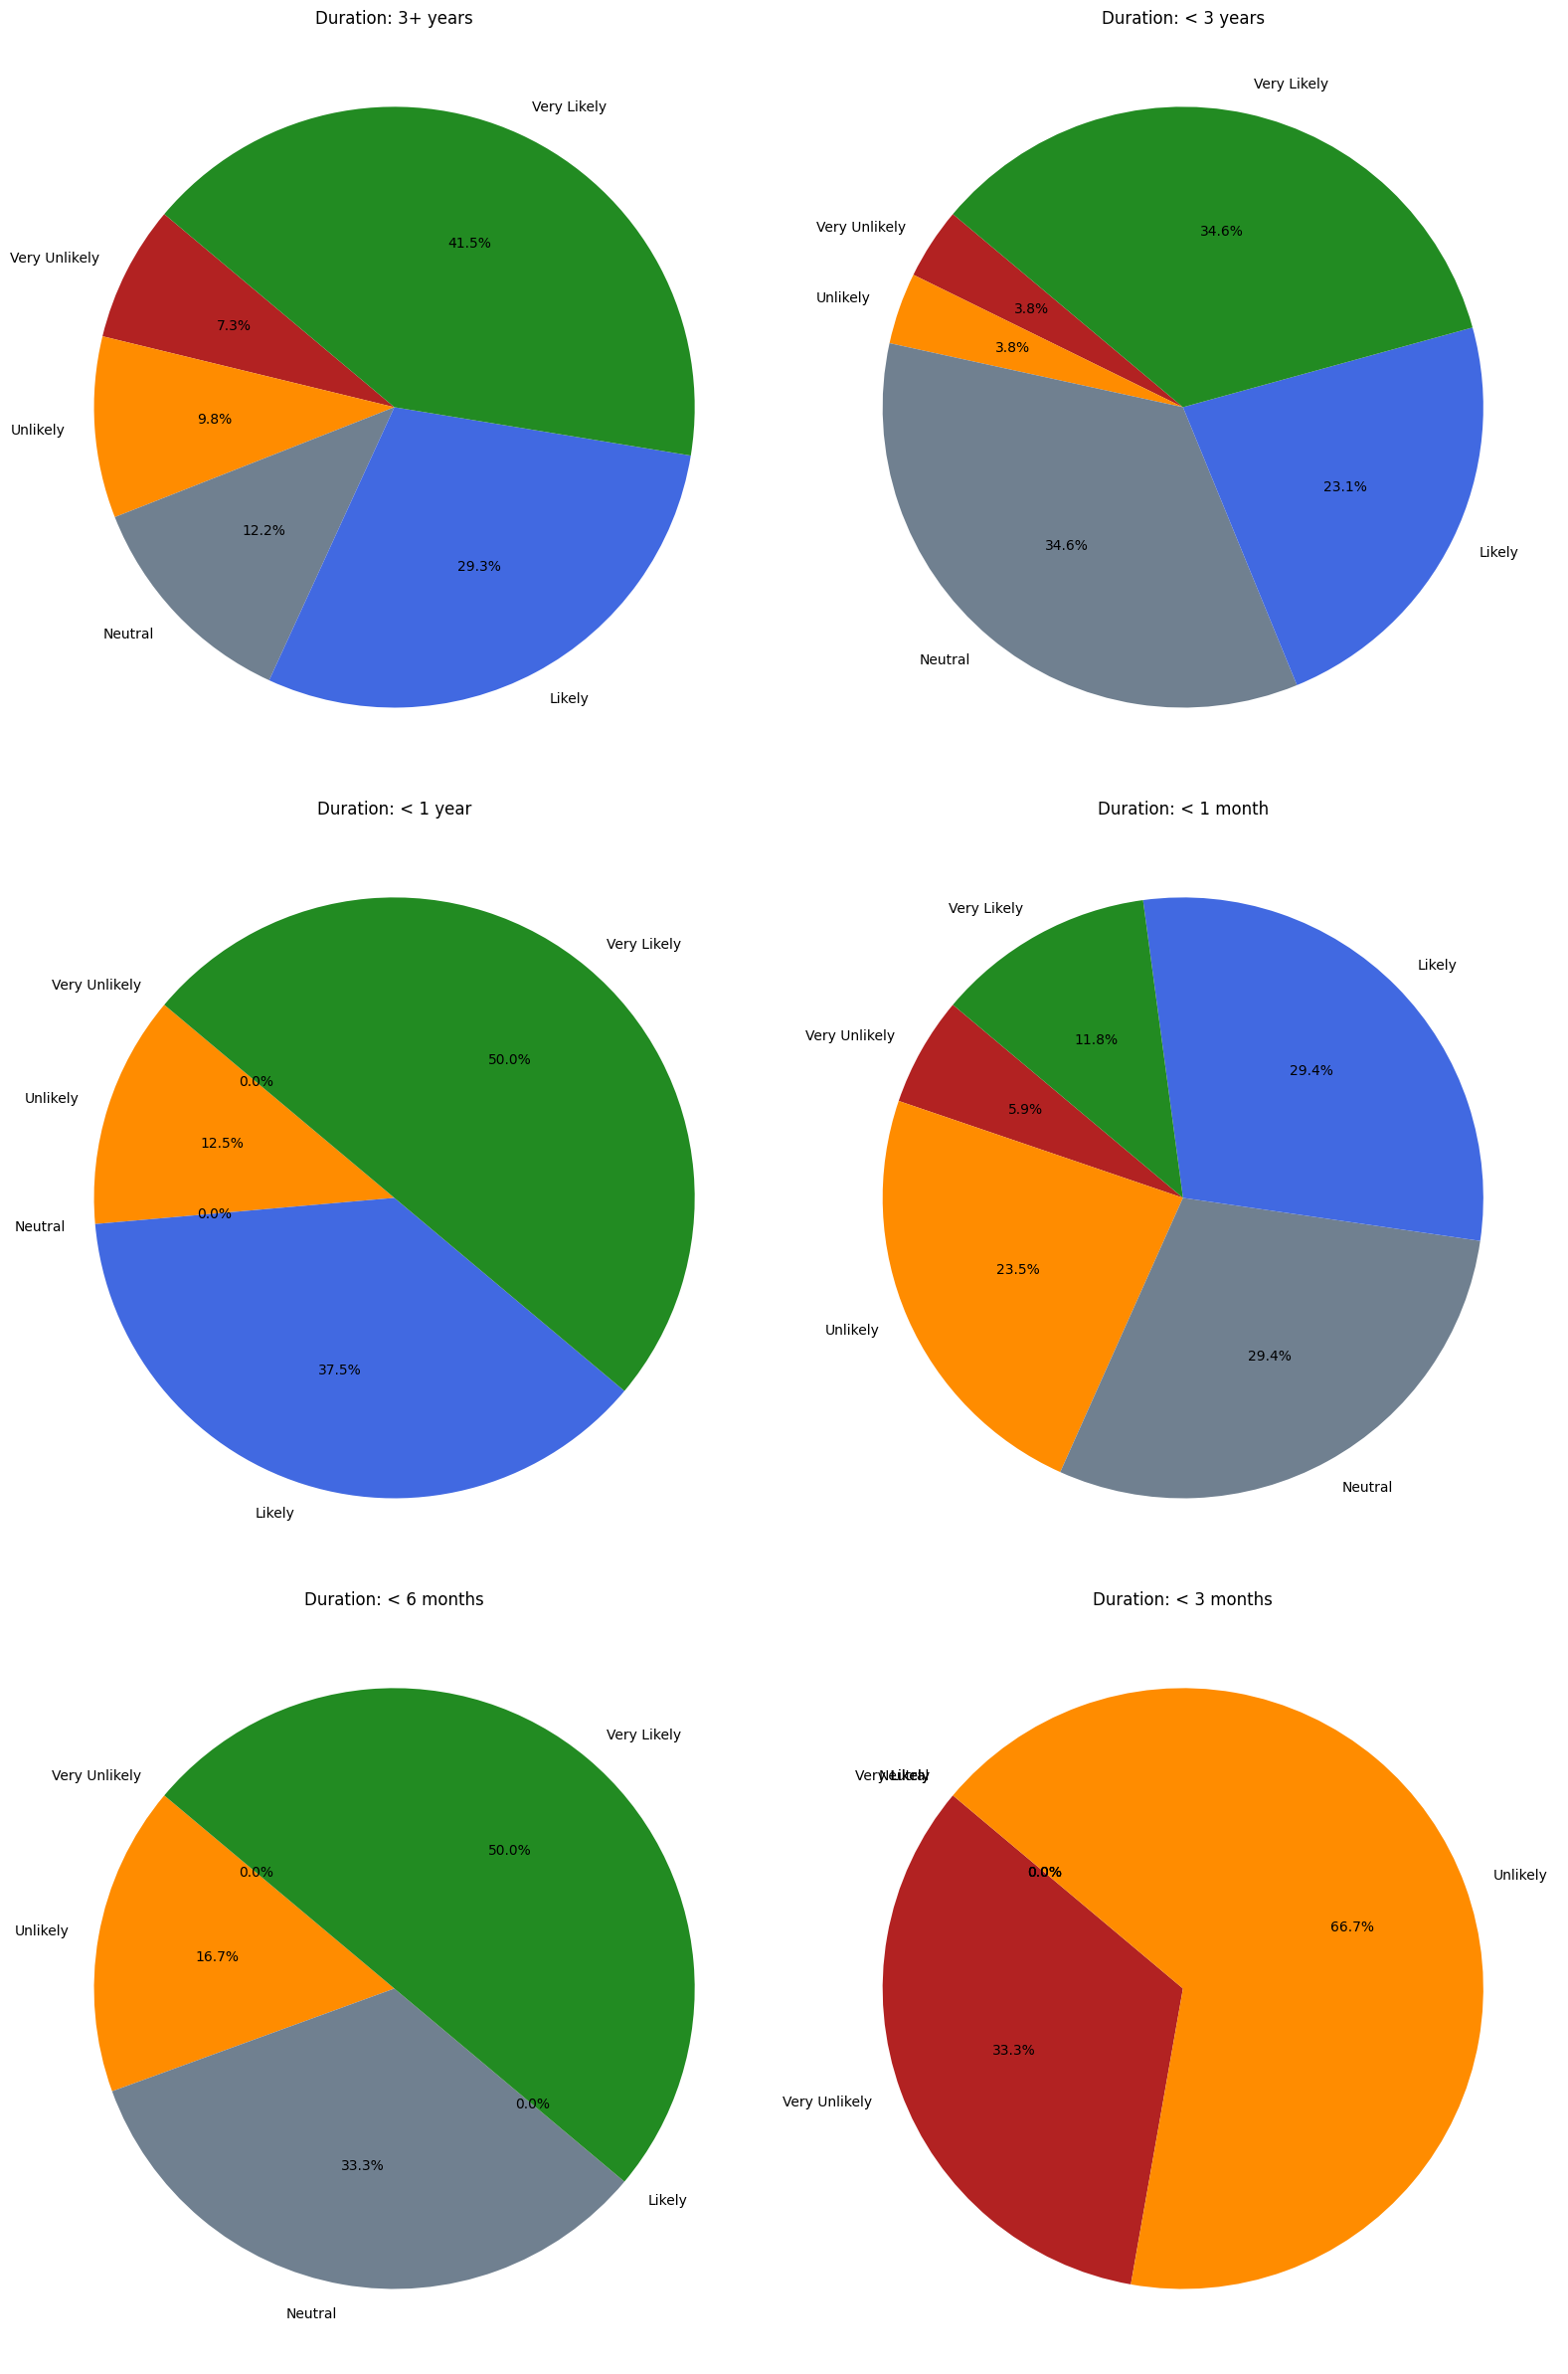

In [101]:
duration_cancellation_df = gym_survey_df[[
    "How long have you been going to the gym?", 
    "If your gym partner canceled, how likely would you be to still go to the gym?"
]]

unique_durations = duration_cancellation_df["How long have you been going to the gym?"].unique()
color_mapping = {
    "Very Unlikely": "firebrick",
    "Unlikely": "darkorange",
    "Neutral": "slategrey",
    "Likely": "royalblue",
    "Very Likely": "forestgreen"
}

n_cols = 2
n_rows = int(np.ceil(len(unique_durations) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8 * n_rows))
axs = axs.ravel() 

for i, duration in enumerate(unique_durations):
    subset_df = duration_cancellation_df[duration_cancellation_df["How long have you been going to the gym?"] == duration]
    response_counts = subset_df["If your gym partner canceled, how likely would you be to still go to the gym?"].value_counts()
    responses_sorted = response_counts.reindex(color_mapping.keys()).fillna(0)
    colors = [color_mapping[response] for response in responses_sorted.index]
    axs[i].pie(responses_sorted, labels=responses_sorted.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Duration: {duration}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Statistical analysis (Fast)

In [102]:
import statsmodels.api as sm

In [103]:
partner_preference_mapping = {
    'Alone': 0,
    'no preference': 0.5,
    'With a partner': 1,
    'With partners': 1
}

likelihood_if_partner_cancels_mapping = {
    'Very Likely': 4,
    'Likely': 3,
    'Neutral': 2,
    'Unlikely': 1,
    'Very Unlikely': 0
}

motivation_weather_mapping = {
    'I would be more likely to go to the gym if my partner was going': 1,
    "My partner going to the gym wouldn't affect my decision to not go": 0.5,
    'I would be less likely to go to the gym if my partner was going': 0
}

gym_survey_stat_test = gym_survey_df.copy()

gym_survey_stat_test['Partner_Preference_Score'] = gym_survey_stat_test['Do you prefer going to the gym alone or with a partner/partners?'
                    ].map(partner_preference_mapping)

gym_survey_stat_test['Likelihood_If_Partner_Cancels_Score'] = gym_survey_stat_test[
                    'If your gym partner canceled, how likely would you be to still go to the gym?'
                    ].map(likelihood_if_partner_cancels_mapping)

gym_survey_stat_test['Motivation_Weather_Score'] = gym_survey_stat_test[
                    'If you had to walk to the gym and the weather was mild/heavy rain and you didn\'t really want to go, but your gym partner was still going despite the weather, how likely would you be to go anyway?'
                    ].map(motivation_weather_mapping)

gym_survey_stat_test = pd.concat([gym_survey_stat_test, gym_duration_dummies], axis=1)

In [104]:
y1 = gym_survey_stat_test['Partner_Preference_Score']
X1 = gym_survey_stat_test[['On average, how many days do you actually go to the gym in a week?']]
X1 = sm.add_constant(X1)

model1 = sm.OLS(y1, X1).fit()

print("Model 1: Partner Preference Score as Dependent Variable")
print(model1.summary())
print("\n\n")

Model 1: Partner Preference Score as Dependent Variable
                               OLS Regression Results                               
Dep. Variable:     Partner_Preference_Score   R-squared:                       0.006
Model:                                  OLS   Adj. R-squared:                 -0.005
Method:                       Least Squares   F-statistic:                    0.5481
Date:                      Tue, 12 Mar 2024   Prob (F-statistic):              0.461
Time:                              17:48:43   Log-Likelihood:                -63.336
No. Observations:                       101   AIC:                             130.7
Df Residuals:                            99   BIC:                             135.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                                                         coef    std err      

In [105]:
y2 = gym_survey_stat_test['Motivation_Weather_Score']
X2 = gym_survey_stat_test[['On average, how many days do you actually go to the gym in a week?']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()

print("Model 2: Motivation Weather Score as Dependent Variable")
print(model2.summary())
print("\n\n")

Model 2: Motivation Weather Score as Dependent Variable
                               OLS Regression Results                               
Dep. Variable:     Motivation_Weather_Score   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.010
Method:                       Least Squares   F-statistic:                  0.001913
Date:                      Tue, 12 Mar 2024   Prob (F-statistic):              0.965
Time:                              17:48:43   Log-Likelihood:                -17.551
No. Observations:                       101   AIC:                             39.10
Df Residuals:                            99   BIC:                             44.33
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                                                         coef    std err      

In [106]:
y3 = gym_survey_stat_test['Likelihood_If_Partner_Cancels_Score']
X3 = gym_survey_stat_test[['On average, how many days do you actually go to the gym in a week?']]
X3 = sm.add_constant(X3)


model3 = sm.OLS(y3, X3).fit()

print("Model 3: Likelihood If Partner Cancels Score as Dependent Variable")
print(model3.summary())
print("\n\n")

Model 3: Likelihood If Partner Cancels Score as Dependent Variable
                                     OLS Regression Results                                    
Dep. Variable:     Likelihood_If_Partner_Cancels_Score   R-squared:                       0.139
Model:                                             OLS   Adj. R-squared:                  0.131
Method:                                  Least Squares   F-statistic:                     16.02
Date:                                 Tue, 12 Mar 2024   Prob (F-statistic):           0.000121
Time:                                         17:48:43   Log-Likelihood:                -156.74
No. Observations:                                  101   AIC:                             317.5
Df Residuals:                                       99   BIC:                             322.7
Df Model:                                            1                                         
Covariance Type:                             nonrobust               

In [111]:
y4 = gym_survey_stat_test['Partner_Preference_Score']
X4 = gym_survey_stat_test.filter(regex='^Duration_')
X4 = X4 * 1
X4 = sm.add_constant(X4) 

model4 = sm.OLS(y4, X4).fit()

print("Model 4: Partner Preference Score ~ Duration")
print(model4.summary())
print("\n\n")

Model 4: Partner Preference Score ~ Duration
                               OLS Regression Results                               
Dep. Variable:     Partner_Preference_Score   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                 -0.002
Method:                       Least Squares   F-statistic:                    0.9591
Date:                      Tue, 12 Mar 2024   Prob (F-statistic):              0.447
Time:                              17:49:33   Log-Likelihood:                -61.128
No. Observations:                       101   AIC:                             134.3
Df Residuals:                            95   BIC:                             149.9
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [112]:
y5 = gym_survey_stat_test['Motivation_Weather_Score']
X5 = gym_survey_stat_test.filter(regex='^Duration_') 
X5 = X5 * 1
X5 = sm.add_constant(X5)  

model5 = sm.OLS(y5, X5).fit()

print("Model 5: Motivation Weather Score ~ Duration")
print(model5.summary())
print("\n\n")

Model 5: Motivation Weather Score ~ Duration
                               OLS Regression Results                               
Dep. Variable:     Motivation_Weather_Score   R-squared:                       0.098
Model:                                  OLS   Adj. R-squared:                  0.050
Method:                       Least Squares   F-statistic:                     2.062
Date:                      Tue, 12 Mar 2024   Prob (F-statistic):             0.0769
Time:                              17:51:16   Log-Likelihood:                -12.348
No. Observations:                       101   AIC:                             36.70
Df Residuals:                            95   BIC:                             52.39
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [113]:
y6 = gym_survey_stat_test['Likelihood_If_Partner_Cancels_Score']
X6 = gym_survey_stat_test.filter(regex='^Duration_')
X6 = X6 * 1
X6 = sm.add_constant(X6)  

model6 = sm.OLS(y6, X6).fit()

print("Model 6: Likelihood If Partner Cancels Score ~ Duration")
print(model6.summary())
print("\n\n")

Model 6: Likelihood If Partner Cancels Score ~ Duration
                                     OLS Regression Results                                    
Dep. Variable:     Likelihood_If_Partner_Cancels_Score   R-squared:                       0.138
Model:                                             OLS   Adj. R-squared:                  0.093
Method:                                  Least Squares   F-statistic:                     3.052
Date:                                 Tue, 12 Mar 2024   Prob (F-statistic):             0.0134
Time:                                         17:51:31   Log-Likelihood:                -156.79
No. Observations:                                  101   AIC:                             325.6
Df Residuals:                                       95   BIC:                             341.3
Df Model:                                            5                                         
Covariance Type:                             nonrobust                          

In [118]:
# Dummy variables cause the variables are categorical not numerical
gym_duration_dummies = pd.get_dummies(gym_survey_stat_test['How long have you been going to the gym?'], prefix='Duration')

X7 = pd.concat([
    gym_survey_stat_test[['Partner_Preference_Score', 'Motivation_Weather_Score', 'Likelihood_If_Partner_Cancels_Score']],
    gym_duration_dummies], axis=1)

X7 = X7 * 1
y7 = gym_survey_stat_test['On average, how many days do you actually go to the gym in a week?']
X7 = sm.add_constant(X7)
model7 = sm.OLS(y7, X7).fit()
print("Model 7: Predictors for how long have you been going to the gym")
print(model7.summary())
print("\n\n")

Model 7: Predictors for how long have you been going to the gym
                                                    OLS Regression Results                                                    
Dep. Variable:     On average, how many days do you actually go to the gym in a week?   R-squared:                       0.422
Model:                                                                            OLS   Adj. R-squared:                  0.372
Method:                                                                 Least Squares   F-statistic:                     8.393
Date:                                                                Tue, 12 Mar 2024   Prob (F-statistic):           1.70e-08
Time:                                                                        17:54:02   Log-Likelihood:                -176.15
No. Observations:                                                                 101   AIC:                             370.3
Df Residuals:                                  

Yeah, this definitely needs PCA, but I don't have time to finish that now. Unfortunate, guess we can just use the singular ols regression tests

# Summary

Model 1: Partner Preference Score as Dependent Variable


R-squared:


0.006 indicates that only 0.6% of the variance in Partner Preference Score is explained by the model, suggesting a weak model fit.


Days at Gym Coefficient:


-0.0185 with a p-value of 0.461. This coefficient is not statistically significant, indicating that the number of days one goes to the gym in a week does not have a significant effect on their partner preference score.




Model 2: Motivation Weather Score as Dependent Variable


R-squared:


0.000, essentially zero, indicating that the model does not explain any variance in the Motivation Weather Score, showing a very weak fit.


Days at Gym Coefficient:


-0.0007 with a p-value of 0.965, which is not statistically significant, suggesting no effect of gym attendance days on motivation weather score.




Model 3: Likelihood If Partner Cancels Score as Dependent Variable


R-squared:


0.139, showing that the model explains 13.9% of the variance in the Likelihood If Partner Cancels Score, which is relatively better than the first two models but still modest.


Days at Gym Coefficient: 0.2524 with a p-value of 0.000121, indicating a statistically significant positive relationship. This suggests that the more days one goes to the gym, the more likely they are to still go even if their partner cancels.




Model 4: Partner Preference Score ~ Duration


R-squared:


0.048, indicating the model explains 4.8% of the variance in Partner Preference Score, which is relatively low.


Duration Coefficients:


Some duration categories like "Duration_3+ years" have coefficients with p-values indicating potential significance (e.g., 0.056 for "Duration_3+ years"), but generally, the model does not strongly support significant effects of gym duration on partner preference.




Model 5: Motivation Weather Score ~ Duration


R-squared:


0.098, suggesting the model explains 9.8% of the variance in Motivation Weather Score, which is moderate.


Duration Coefficients:


Certain categories like "Duration_3+ years" and "Duration_< 3 years" show significant coefficients, indicating that the duration of gym attendance may have a significant effect on motivation during bad weather.




Model 6: Likelihood If Partner Cancels Score ~ Duration


R-squared:


0.138, similar to Model 3, this model explains 13.8% of the variance in the Likelihood If Partner Cancels Score.


Duration Coefficients:


Categories like "Duration_3+ years" and "Duration_< 1 year" show significant positive coefficients, suggesting that longer durations of gym attendance are associated with a higher likelihood of going to the gym even if the partner cancels.




Model 7: Gym Attendance Days ~ Various Factors + Duration


R-squared:


0.422, indicating a much stronger model that explains 42.2% of the variance in gym attendance days.


Coefficients:


The significant coefficients for "Likelihood_If_Partner_Cancels_Score" and various duration categories (e.g., "Duration_3+ years", "Duration_< 1 month", "Duration_< 3 years") suggest these factors have a notable impact on the number of days one goes to the gym in a week.